# Descripción del modelo:

Si tomamos la condición actual (con uso de bote) como un modelo previo (**antes**), e implementamos un modelo con drones (**despues**). Para poder decidir sí a la implementación del modelo, se selecciona los TMI obtenidos de la simuñación de ambos modelos, con uso de botes y con uso de drones. 
En vista de los datos obtenidos ¿Hay diferencia significativa entre el rendimiento de ambos modelos?

## Hipótesis

- 𝐻0 : no hay diferencia entre el tiempo medio entre el modelo de botes y el modelo de drones. El promedio de las diferencias es cero ( 𝜇𝑑=0 ).
- 𝐻𝑎 : sí hay diferencia entre el tiempo medio entre el modelo de botes y el modelo de drones. El promedio de las diferencias no es cero ( 𝜇𝑑≠0 ).

## Estadístico observado

El estadístico es el valor que se calcula a partir de la muestra y que se quiere extrapolar a la población de origen. En este caso, es el promedio de las diferencias entre cada par de observaciones  𝑑⎯⎯⎯=−0.5 .

In [2]:
#pip install pingouin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [3]:
datos_drones = pd.read_csv('Drones.csv', sep=';', decimal=",")
datos_drones.rename(columns = {'TMI':'TMI_despues'}, inplace = True)
print(datos_drones)

     Embarcaciones  Drones  Prob. de falla  TMI_despues
0               15       1           0.000       133.87
1               15       1           0.000       101.60
2               15       1           0.000        99.80
3               15       1           0.000       122.27
4               15       1           0.000       123.13
..             ...     ...             ...          ...
805             45       5           0.004        48.27
806             45       5           0.004        57.78
807             45       5           0.004        55.87
808             45       5           0.004        73.40
809             45       5           0.004        47.11

[810 rows x 4 columns]


In [4]:
datos_bote = pd.read_csv('Bote.csv', sep=';', decimal=",")
datos_bote.rename(columns = {'TMI':'TMI_antes'}, inplace = True)
print(datos_bote)

     Embarcaciones  Botes  Tiempo de navegacion  TMI_antes
0               15      1                  2220     148.00
1               15      1                  4275     285.00
2               15      1                  5093     339.53
3               15      1                  2943     196.20
4               15      1                  6297     419.80
..             ...    ...                   ...        ...
805             45      1                  7593     168.73
806             45      1                  6735     149.67
807             45      1                  6720     149.33
808             45      1                  7536     167.47
809             45      1                  9578     212.84

[810 rows x 4 columns]


In [5]:
datos = pd.concat([datos_bote, datos_drones], axis=1)
display(datos)

,Embarcaciones,Botes,Tiempo de navegacion,TMI_antes,Embarcaciones,Drones,Prob. de falla,TMI_despues
0,15,1,2220,148.00,15,1,0.000,133.87
1,15,1,4275,285.00,15,1,0.000,101.60
2,15,1,5093,339.53,15,1,0.000,99.80
3,15,1,2943,196.20,15,1,0.000,122.27
4,15,1,6297,419.80,15,1,0.000,123.13
...,...,...,...,...,...,...,...,...
805,45,1,7593,168.73,45,5,0.004,48.27
806,45,1,6735,149.67,45,5,0.004,57.78
807,45,1,6720,149.33,45,5,0.004,55.87
808,45,1,7536,167.47,45,5,0.004,73.40


In [6]:
datos.iloc[:,3].describe()

count    810.000000
mean     254.385333
std       83.133528
min      109.500000
25%      202.400000
50%      240.385000
75%      289.330000
max      514.930000
Name: TMI_antes, dtype: float64

In [7]:
datos.iloc[:,7].describe()

count    810.000000
mean      75.577481
std       22.936254
min       36.220000
25%       58.630000
50%       69.850000
75%       85.550000
max      174.670000
Name: TMI_despues, dtype: float64

In [21]:
datos['diferencia'] = datos['TMI_antes'] - datos['TMI_despues']
datos.head()

,Embarcaciones,Botes,Tiempo de navegacion,TMI_antes,Embarcaciones,Drones,Prob. de falla,TMI_despues,diferencia
0,15,1,2220,148.00,15,1,0.0,133.87,14.13
1,15,1,4275,285.00,15,1,0.0,101.60,183.40
2,15,1,5093,339.53,15,1,0.0,99.80,239.73
3,15,1,2943,196.20,15,1,0.0,122.27,73.93
4,15,1,6297,419.80,15,1,0.0,123.13,296.67


In [22]:
datos['diferencia'].describe()

count    810.000000
mean     178.807852
std       82.559871
min      -10.230000
25%      117.747500
50%      168.735000
75%      221.430000
max      462.260000
Name: diferencia, dtype: float64

In [23]:
datos

,Embarcaciones,Botes,Tiempo de navegacion,TMI_antes,Embarcaciones,Drones,Prob. de falla,TMI_despues,diferencia
0,15,1,2220,148.00,15,1,0.000,133.87,14.13
1,15,1,4275,285.00,15,1,0.000,101.60,183.40
2,15,1,5093,339.53,15,1,0.000,99.80,239.73
3,15,1,2943,196.20,15,1,0.000,122.27,73.93
4,15,1,6297,419.80,15,1,0.000,123.13,296.67
...,...,...,...,...,...,...,...,...,...
805,45,1,7593,168.73,45,5,0.004,48.27,120.46
806,45,1,6735,149.67,45,5,0.004,57.78,91.89
807,45,1,6720,149.33,45,5,0.004,55.87,93.46
808,45,1,7536,167.47,45,5,0.004,73.40,94.07


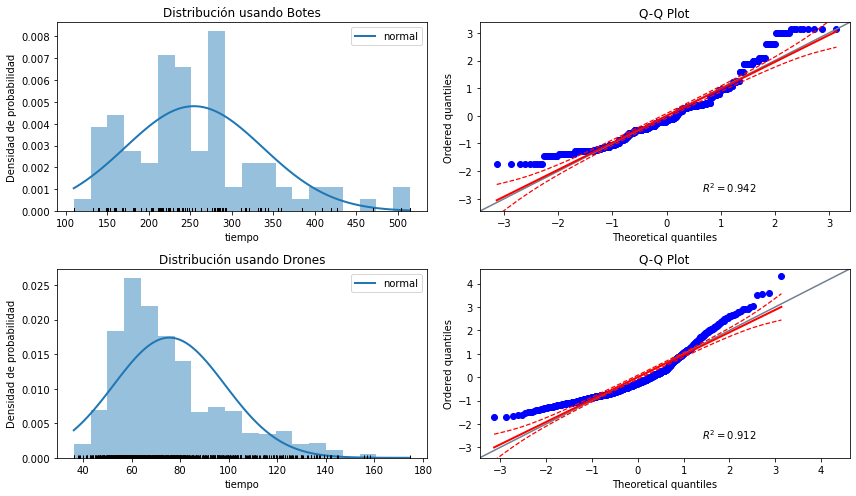

In [27]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

# Valores de la media (mu) y desviación típica (sigma)
mu, sigma = stats.norm.fit(datos['TMI_antes'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(datos['TMI_antes']), max(datos['TMI_antes']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=datos['TMI_antes'], density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(datos['TMI_antes'], np.full_like(datos['TMI_antes'], -0.0), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución usando Botes')
axs[0, 0].set_xlabel('tiempo')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot
pg.qqplot(datos['TMI_antes'], dist='norm', ax=axs[0, 1])

mu, sigma = stats.norm.fit(datos['TMI_despues'])
x_hat = np.linspace(min(datos['TMI_despues']), max(datos['TMI_despues']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=datos['TMI_despues'], density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(datos['TMI_despues'], np.full_like(datos['TMI_despues'], -0.0), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución usando Drones')
axs[1, 0].set_xlabel('tiempo')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

pg.qqplot(datos['TMI_despues'], dist='norm', ax=axs[1, 1])
plt.tight_layout();

In [28]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=datos['TMI_antes'])

,W,pval,normal
TMI_antes,0.941361,2.378847e-17,False


De acuerdo al resultado obtenido, los datos obtenidos no se distribuyen normalmente.

In [29]:
pg.normality(data=datos['TMI_despues'])

,W,pval,normal
TMI_despues,0.911989,3.018121e-21,False


De acuerdo al resultado obtenido, los datos no se distribuyen normalmente.

In [30]:
# Test para datos dependientes (p-value, intervalos de confianza)
# ==============================================================================

pg.ttest(
    x           = datos['TMI_antes'],
    y           = datos['TMI_despues'],
    alternative = 'two-sided',
    paired      = True,
    correction  = False
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,61.639639,809,two-sided,7.031502e-308,"[173.11, 184.5]",2.932211,4.008e+303,1.0


**El p-value obtenido por el t-test pareado es inferior al nivel de significancia establecido** ( 𝑎𝑙𝑝ℎ𝑎=0.05 ), por lo cual, se rechaza la hipótesis nula en favor de la hipótesis alternativa, esto quiere decir que el rendimiento del modelo ha cambiado (mejorado).